In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
data.shape

(150, 5)

The database has no null value but the database may contain many duplicated values.We need to remove it as possible.]

In [86]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
count=data["species"].value_counts()
count

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

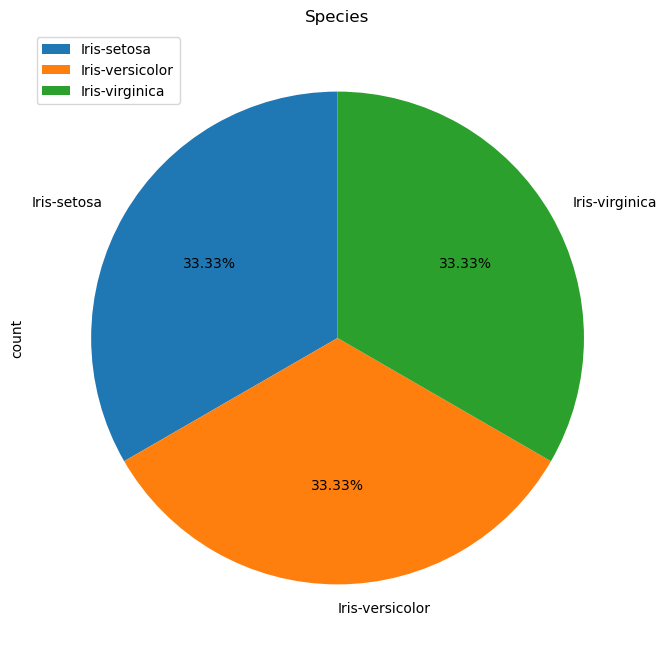

In [88]:
plt.figure(figsize=(8,8))
count.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=count.index)
plt.show()

Here the pie vchart is made for the whole Three species available in the dataset.Here all the species have 50 count.So the portion is equally Divided into three parts.

In [89]:
data.duplicated().head(8)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [90]:
data.duplicated().sum()

3

In [91]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [92]:
data.shape

(147, 5)

In [93]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [95]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [137]:
species_counts=data["species"].value_counts()
species_counts

species
1    50
2    49
0    48
Name: count, dtype: int64

In [97]:
data.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


by the mean value of the length and width we can easily classify the variety of the iris flower.

In [98]:
#data["species"]=data["species"].map({"Iris-setosa":1,"iris-versicolor":2,"Iris-virginica":3})
#data.head(10)

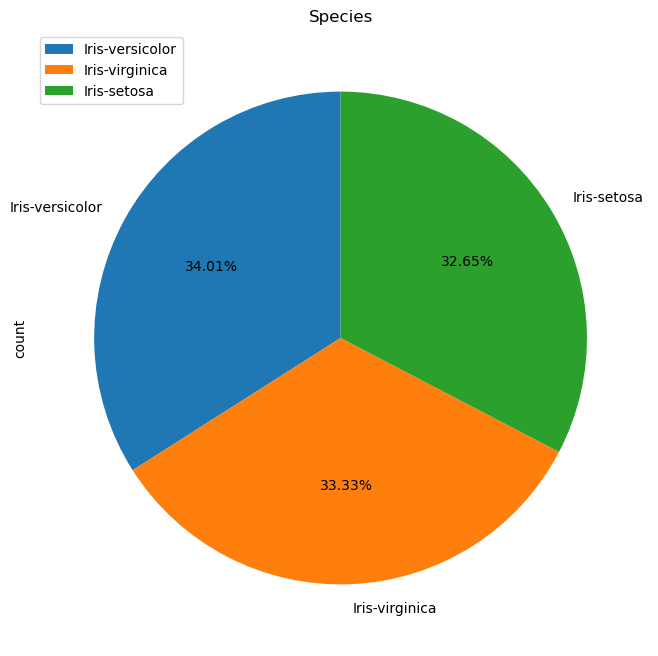

In [99]:
plt.figure(figsize=(8,8))
species_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=species_counts.index)
plt.show()

Here the pie chart is drawn for the same available species in the dataset.But the duplicated species are dropes then the portion is divided into unequal portion as their count.

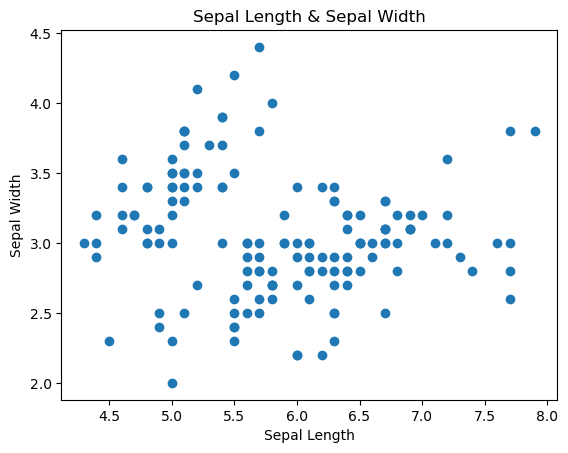

In [100]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

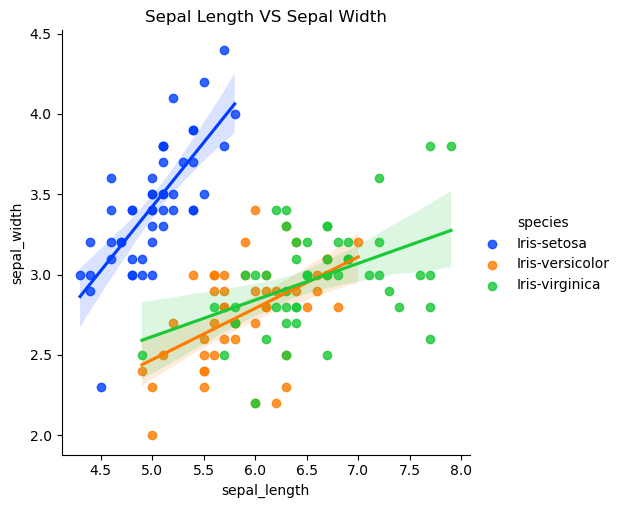

In [101]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=data
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

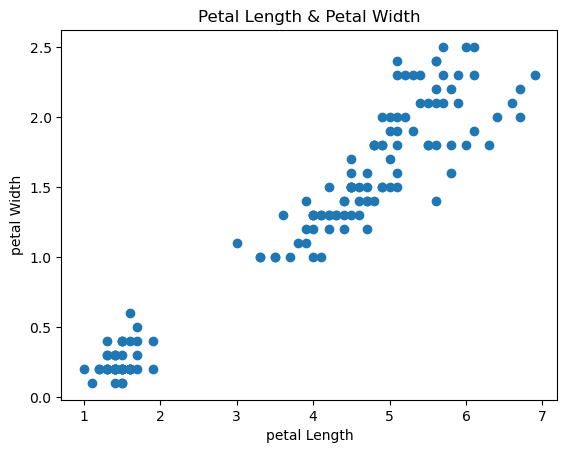

In [102]:
plt.scatter(data['petal_length'], data['petal_width'])
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Petal Length & Petal Width')
plt.show()

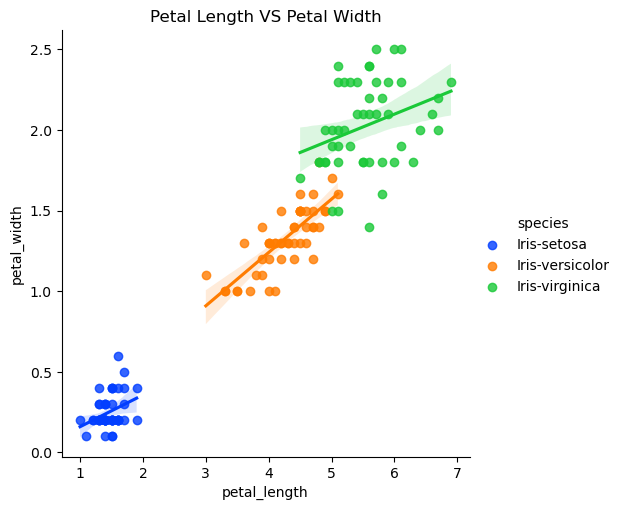

In [103]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=data
)

plt.title("Petal Length VS Petal Width")
plt.show()

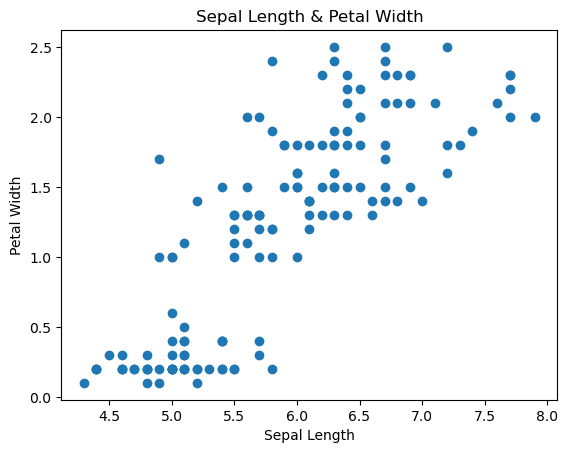

In [107]:
plt.scatter(data['sepal_length'], data['petal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Sepal Length & Petal Width')
plt.show()

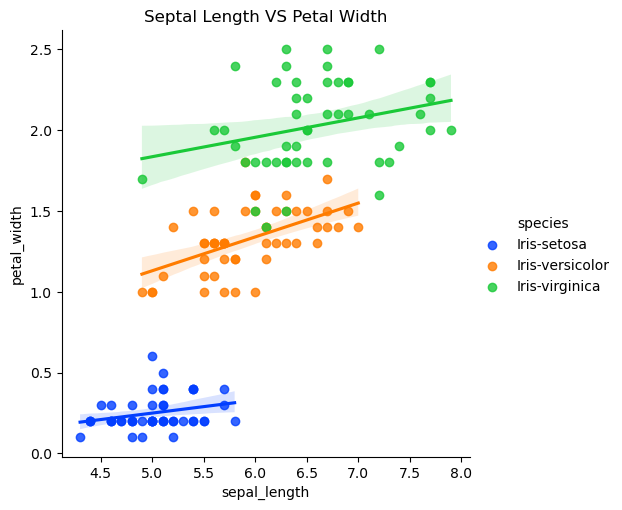

In [105]:
sns.lmplot(
    x="sepal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=data
)

plt.title("Septal Length VS Petal Width")
plt.show()

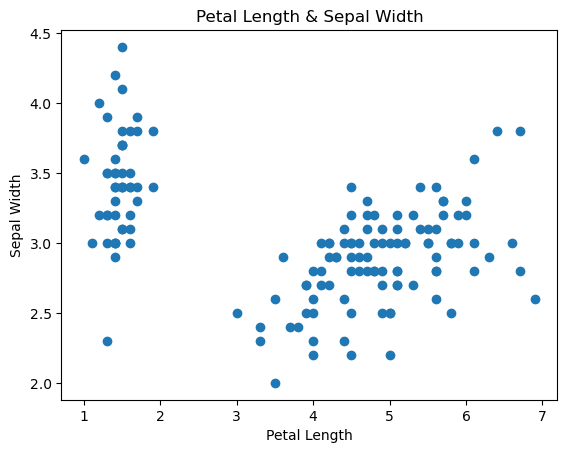

In [108]:
plt.scatter(data['petal_length'], data['sepal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Petal Length & Sepal Width')
plt.show()

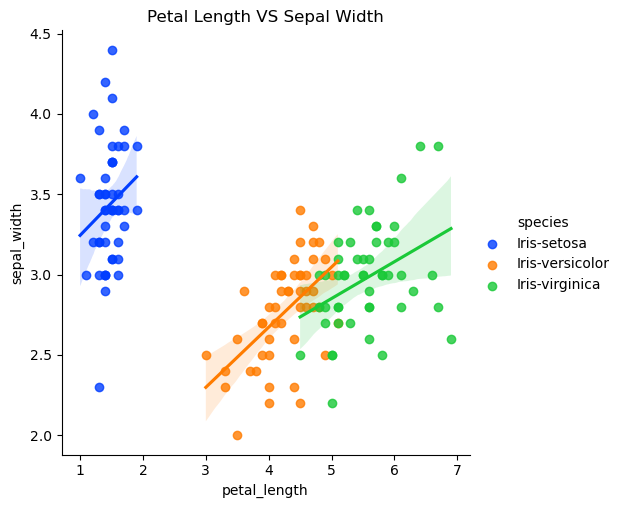

In [106]:
sns.lmplot(
    x="petal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=data
)

plt.title("Petal Length VS Sepal Width")
plt.show()

In [110]:
label = LabelEncoder()
data['species'] = label.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
varient=data.drop("species",axis=1)
species=data["species"]

In [113]:
varient.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [117]:
varient_train, varient_test, species_train, species_test = train_test_split(varient,species,test_size=0.2,random_state=41)

In [119]:
varient_train.head()

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2
85,6.0,3.4,4.5,1.6
77,6.7,3.0,5.0,1.7


In [120]:
varient_test.head()

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
122,7.7,2.8,6.7,2.0
51,6.4,3.2,4.5,1.5
118,7.7,2.6,6.9,2.3
106,4.9,2.5,4.5,1.7


In [121]:
species_train

89     1
145    2
14     0
85     1
77     1
      ..
26     0
91     1
67     1
82     1
143    2
Name: species, Length: 117, dtype: int32

In [123]:
species_test.head()

127    2
122    2
51     1
118    2
106    2
Name: species, dtype: int32

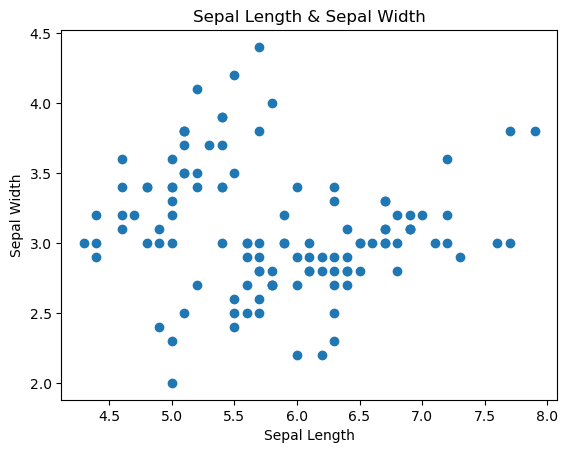

In [124]:
plt.scatter(varient_train['sepal_length'], varient_train['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

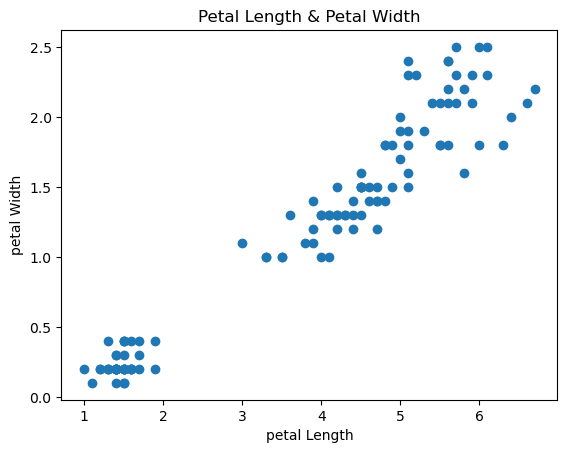

In [127]:
plt.scatter(varient_train['petal_length'], varient_train['petal_width'])
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Petal Length & Petal Width')
plt.show()

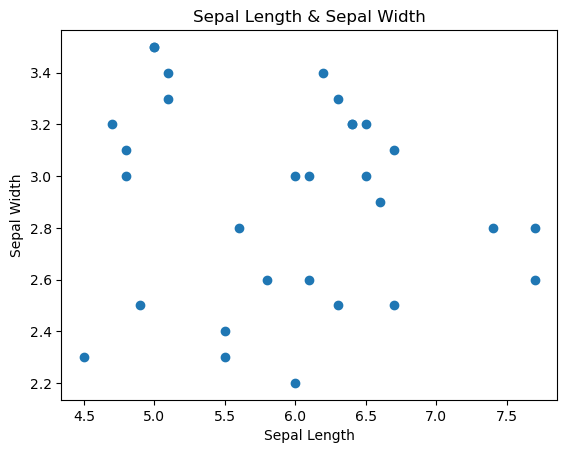

In [128]:
plt.scatter(varient_test['sepal_length'], varient_test['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

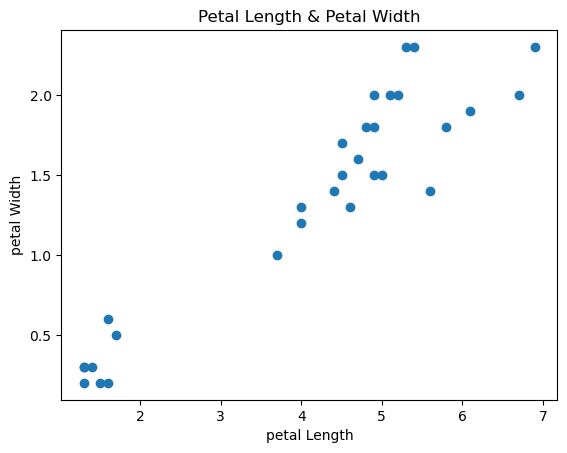

In [129]:
plt.scatter(varient_test['petal_length'], varient_test['petal_width'])
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Petal Length & Petal Width')
plt.show()

In [138]:
varient.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


In [140]:
#plt.figure(figsize=(10, 8))  
#sns.heatmap(varient.corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()

C:\Users\Ajith G\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


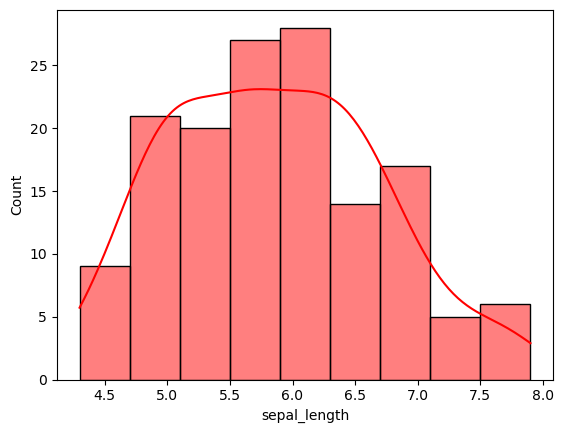

In [151]:
sns.histplot(data=data, x="sepal_length",color="red",kde=True)
plt.show()

C:\Users\Ajith G\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


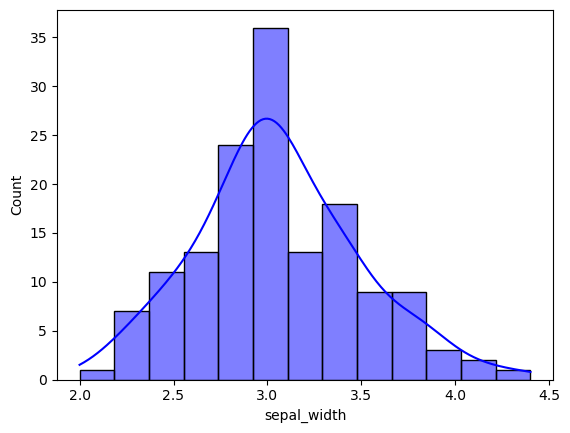

In [145]:
sns.histplot(data=data, x="sepal_width",color="blue",kde=True)
plt.show()

C:\Users\Ajith G\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


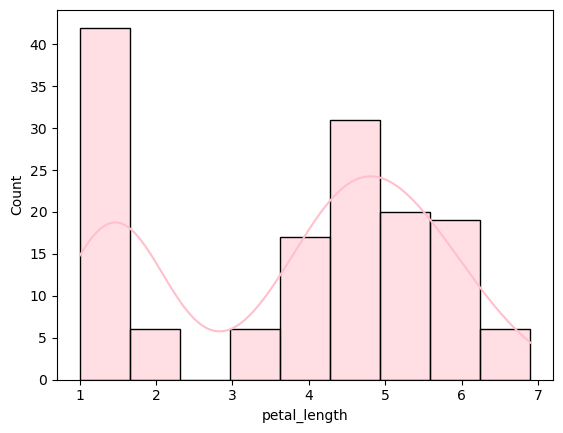

In [148]:
sns.histplot(data=data, x="petal_length",color="pink",kde=True)
plt.show()

C:\Users\Ajith G\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


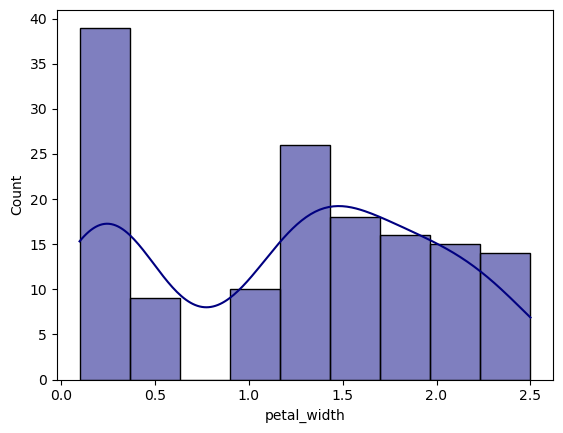

In [149]:
sns.histplot(data=data, x="petal_width",color="navy",kde=True)
plt.show()